In [154]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<h2>Cálculo dos parâmetros do transformador<h2>

In [155]:
# Teste em vazio

Vo = 230
Io = 108
Po = 5000

# Teste em curto circuito

Vcc = 13.75
Icc = 217.39
Pcc = 945.2

# Outros parametros

alpha = 10
fp = 0.92

<h5>Espressões para Rc e Xm:

In [156]:
Rc = Vo**2/Po
Ic = Vo/Rc
Im = math.sqrt(Io**2 - Ic**2)
Xm = Vo/Im

print("Rc = ", Rc)
print("Xm = ", Xm)
print("Ic = ", Ic)
print("Im = ", Im)

Rc =  10.58
Xm =  2.174129599413981
Ic =  21.73913043478261
Im =  105.78946170550027


<h5>Referindo os valores para o lado de alta tensão

<h5>Expressões para R1, X1, R2 e X2

In [157]:
Req = Pcc/(Icc**2)
Zeq = Vcc/Icc
Xeq = math.sqrt(Zeq**2 - Req**2)

R1 = Req/2
R2 = Req/(2*alpha**2)
X1 = Xeq/2
X2 = Xeq/(2*alpha**2)

print("Req = ", Req*1000, "m Ohm")
print("Zeq = ", Zeq*1000, "m Ohm")
print("Xeq = ", Xeq*1000, "m Ohm")
print("R1 = ", 1000*R1, "m Ohm")
print("X1 = ", 1000*X1, "m Ohm")
print("R2 = ",  1000000*R2, "u Ohm")
print("X2 = ",  1000000*X2, "u Ohm")

Req =  20.00067200734407 m Ohm
Zeq =  63.25037950227702 m Ohm
Xeq =  60.00486335653727 m Ohm
R1 =  10.000336003672034 m Ohm
X1 =  30.002431678268636 m Ohm
R2 =  100.00336003672034 u Ohm
X2 =  300.02431678268636 u Ohm


In [158]:
Rc = Rc*alpha**2
Xm = Xm*alpha**2


print("Rc = ", Rc)
print("Xm = ", Xm)

Rc =  1058.0
Xm =  217.4129599413981


<h2>Cálculo do rendimento do trafo<h2>

<h5> Calculando a variação de V2 e E1 com a variação da carga

<h5>Calculando a resistência equivalente referida ao primário

In [159]:
Req2 = Req/(alpha**2)

<h5> Calculando as perdas e o rendimento

In [160]:
Inom = Icc
V1 = 2300
V2 = 230
fp = 0.92
I2 = np.linspace(Inom, 10*Inom, 10)

# Cálculo das perdas
Pc = V1**2/Rc
Pcu = Req2*I2**2
Psaida = V2*I2*fp

#Cálculo do rendimento
eta = Psaida/(Pc + Pcu + Psaida)*100

Plotando o gráfico do rendimento

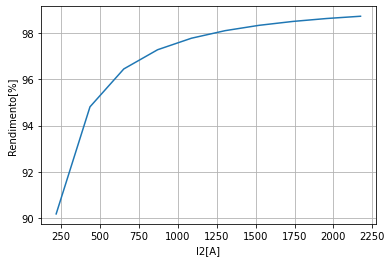

In [161]:
plt.plot(I2, eta)
plt.xlabel("I2[A]")
plt.ylabel("Rendimento[%]")
plt.grid()
plt.savefig('Curva_de_rendimento')

<h5> Gerando tabela das potências

In [162]:
colunas_pot = ['$I_a$', '$P_c$', '$P_{Cu}$', '$P_s$', '$\eta$']
Pc = [5000 for i in range(len(Pcu))]
dados_pot = []

for i in range(len(Pc)):
    dados_pot.append([])
    dados_pot[i].append(round(I2[i], 2))
    dados_pot[i].append(round(Pc[i], 2))
    dados_pot[i].append(round(Pcu[i], 2))
    dados_pot[i].append(round(Psaida[i], 2))
    dados_pot[i].append(round(eta[i], 2))

df_pot = pd.DataFrame(data=dados_pot, columns=colunas_pot)
df_pot.to_csv('Tabela_Transformador_Potencias.csv', index=False)